<a href="https://colab.research.google.com/github/DiliSimon/generative-snowboard/blob/master/KP_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pickle
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
model_weight_path = "kp_rnn.weights.h5"

In [ ]:
with open("keypoint_sequences_normalized.pkl", "rb") as infile:
  keypoint_sequences = pickle.load(infile)
with open("target_predictions_normalized.pkl", "rb") as infile:
  target_predictions = pickle.load(infile)
with open("keypoint_sequences_val_normalized.pkl", "rb") as infile:
  keypoint_sequences_val = pickle.load(infile)
with open("target_predictions_val_normalized.pkl", "rb") as infile:
  target_predictions_val = pickle.load(infile)


In [ ]:
def create_model():
  model = keras.Sequential()
  model.add(keras.Input(shape=(None, 50), dtype="float32")) # unknown number of time steps to look into the past, 50 features (25 keypoint ordered pairs)
  model.add(keras.layers.LSTM(64, return_sequences=True))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LSTM(64))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(64, activation="sigmoid"))
  model.add(keras.layers.Dense(50, activation="sigmoid")) # output 50 features (25 keypoint ordered pairs)

  model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=3e-3, momentum=0.2, nesterov=False),
    loss=keras.losses.MeanSquaredError(),
    metrics=[],
  )

  return model

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)


# Create a callback that saves the model's weights every 5 epochs
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Create a new model instance
model = create_model()

if os.path.isfile(model_weight_path):
  model.load_weights(model_weight_path)

In [55]:
# Training Step
history = model.fit(x=keypoint_sequences,
                    y=target_predictions,
                    validation_data=(keypoint_sequences_val, target_predictions_val),
                    epochs=10,
                    callbacks=[cp_callback])

model.save_weights("kp_rnn_normalized.weights.h5")

Epoch 1/10


Exception ignored in: <function _xla_gc_callback at 0x7997c9eee8c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0589
Epoch 1: val_loss improved from inf to 0.06060, saving model to training_2/cp-0001.weights.h5
101/101 ━━━━━━━━━━━━━━━━━━━━ 103s 36ms/step - loss: 0.0589 - val_loss: 0.0606
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0581
Epoch 2: val_loss improved from 0.06060 to 0.05980, saving model to training_2/cp-0002.weights.h5
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0581 - val_loss: 0.0598
Epoch 3/10
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0577
Epoch 3: val_loss improved from 0.05980 to 0.05903, saving model to training_2/cp-0003.weights.h5
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0577 - val_loss: 0.0590
Epoch 4/10
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0560
Epoch 4: val_loss improved from 0.05903 to 0.05826, saving model to training_2/cp-0004.weights.h5
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0560 - val_loss: 0.0583
Epoch 5/10
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 32

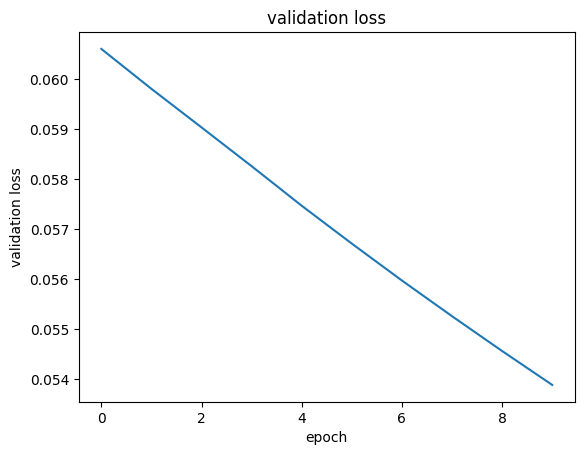

In [56]:
val_loss_values = history.history["val_loss"]
plt.plot(val_loss_values)
plt.title("validation loss")
plt.ylabel("validation loss")
plt.xlabel("epoch")
plt.savefig("val_loss_graph.png")

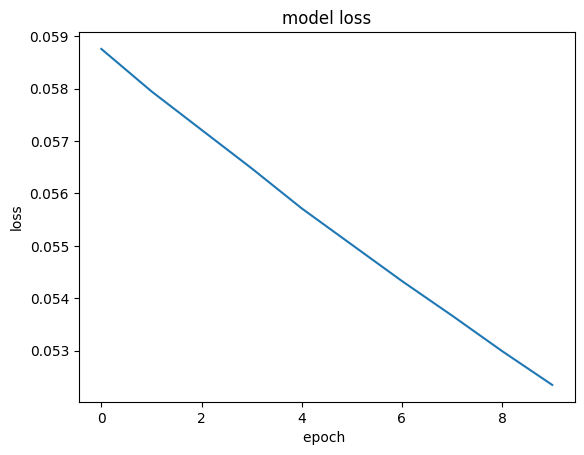

In [57]:
loss_values = history.history["loss"]

plt.plot(loss_values)
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch ")
plt.savefig("loss_graph.png")

In [ ]:
results = model.evaluate(keypoint_sequences_val, target_predictions_val, batch_size=128)
print("test loss, test acc:", results)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0420
test loss, test acc: 0.04246960207819939


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array([[0.4726827 , 0.4530222 , 0.5924011 , ..., 0.52581877, 0.63486063,
        0.2891718 ],
       [0.47394192, 0.4534158 , 0.58953375, ..., 0.5274993 , 0.6363223 ,
        0.28991884],
       [0.47547168, 0.45391193, 0.5872038 , ..., 0.5289977 , 0.6374559 ,
        0.2906535 ],
       ...,
       [0.50247276, 0.4542263 , 0.58156294, ..., 0.5190932 , 0.6204972 ,
        0.2783194 ],
       [0.4998989 , 0.45336512, 0.58202213, ..., 0.5184993 , 0.6217635 ,
        0.27861935],
       [0.49773335, 0.45293456, 0.5817145 , ..., 0.517555  , 0.6237062 ,
        0.27845508]], dtype=float32)